In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
#insert the absolute path to your data and models folder here
DATA_PATH= "/content/drive/MyDrive/FANIYAN PROJECT/CODE/Saved models and Pickles/"

In [7]:
%%capture

import pickle
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
!pip install segmentation-models
from random import randint
import tensorflow
import matplotlib.pyplot as plt
!pip install gradio
import gradio as gr
import requests

In [8]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

'tf.keras'

In [9]:
#download some files to test GUI

# !mkdir "/content/temp"
# %cd "/content/temp"
# import cv2
# j=1
# for i in test_images:
#   name= "oscc"+str(j)+".jpg"
#   cv2.imwrite(name, i)
#   j=j+1

# !zip -r temp /content/temp


In [10]:
def convert_to_dim3(test_preds):
  test_preds= np.expand_dims(test_preds, axis=3)

  n_classes=3
  import tensorflow as tf
  from tensorflow.keras.utils import to_categorical
  test_pred_con = to_categorical(test_preds, num_classes=n_classes)
  test_pred_con = test_pred_con.reshape((test_preds.shape[0], test_preds.shape[1], test_preds.shape[2], n_classes))

  return test_pred_con

In [11]:
from tensorflow import keras
resnet50 = keras.models.load_model(DATA_PATH+"resnet50", compile=False)

In [12]:
model= resnet50
BACKBONE= "resnet50"
def load_predict_image(test_image, model=model, BACKBONE=BACKBONE):
  # test_images= pickle.load(open(DATA_PATH+"test_images.pkl", "rb"))
  # test_masks= pickle.load(open(DATA_PATH+"test_masks.pkl", "rb"))

  preprocess_input= sm.get_preprocessing(BACKBONE)
  test_image= preprocess_input(test_image.reshape(-1, 320, 320, 3))


  test_pred= model.predict(test_image)
  test_pred=  np.argmax(test_pred, axis=3)
  test_pred= convert_to_dim3(test_pred)
  # plt.imshow(test_pred, cmap="gray")

  return test_pred[0]

In [13]:
test_images= pickle.load(open(DATA_PATH+"test_images.pkl", "rb"))
test_masks= pickle.load(open(DATA_PATH+"test_masks.pkl", "rb"))

In [14]:
pred= load_predict_image(test_images[0])

1/1 [==============================] - 3s 3s/step


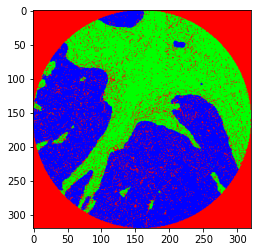

In [15]:
plt.imshow(pred, cmap="gray")

In [16]:
# initializing the input component
image= gr.inputs.Image(shape=(320,320))

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [17]:
# initializing the output component 
mask= gr.outputs.Image("numpy")

/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:42: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [18]:
appTitle= "OSCC IMAGE SEGMENTATION"
appDescription= "Input the image that you want to perform segmentation for and submit"
gr.Interface(fn = load_predict_image,inputs = image,outputs = mask, capture_session = True, title=appTitle, description= appDescription).launch(share=True)

/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://905f9c78bccb8348.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
